In [ ]:
import pandas as pd

# Load the dataset
file_path = 'converted.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
df.head()

,host_is_superhost,cancellation_policy,instant_bookable,host_total_listings_count,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,...,bedrooms_na,bathrooms_na,beds_na,review_scores_rating_na,review_scores_accuracy_na,review_scores_cleanliness_na,review_scores_checkin_na,review_scores_communication_na,review_scores_location_na,review_scores_value_na
0,t,moderate,t,1.0,Western Addition,37.76931,-122.43386,Apartment,Entire home/apt,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,f,strict_14_with_grace_period,f,2.0,Bernal Heights,37.74511,-122.42102,Apartment,Entire home/apt,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,f,strict_14_with_grace_period,f,10.0,Haight Ashbury,37.76669,-122.45250,Apartment,Private room,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,f,strict_14_with_grace_period,f,10.0,Haight Ashbury,37.76487,-122.45183,Apartment,Private room,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,f,strict_14_with_grace_period,f,2.0,Western Addition,37.77525,-122.43637,House,Entire home/apt,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [2]:
# Summary statistics
df.describe(include='all')

# Data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7146 entries, 0 to 7145
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_is_superhost               7146 non-null   object 
 1   cancellation_policy             7146 non-null   object 
 2   instant_bookable                7146 non-null   object 
 3   host_total_listings_count       7146 non-null   float64
 4   neighbourhood_cleansed          7146 non-null   object 
 5   latitude                        7146 non-null   float64
 6   longitude                       7146 non-null   float64
 7   property_type                   7146 non-null   object 
 8   room_type                       7146 non-null   object 
 9   accommodates                    7146 non-null   float64
 10  bathrooms                       7146 non-null   float64
 11  bedrooms                        7146 non-null   float64
 12  beds                            71

In [3]:
# Check for missing values
missing_values = df.isnull().sum()

# Display missing values that are greater than zero
missing_values[missing_values > 0]

Series([], dtype: int64)

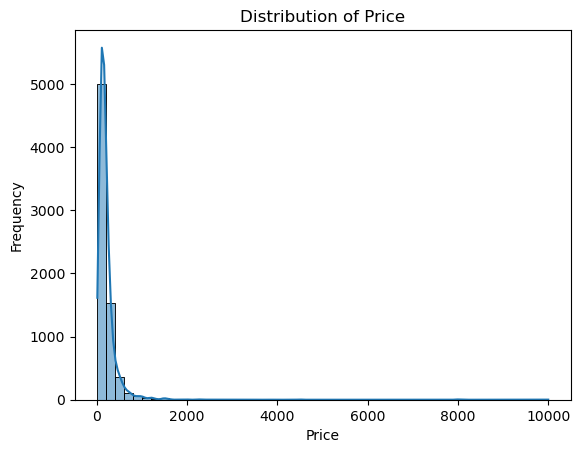

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of the price
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

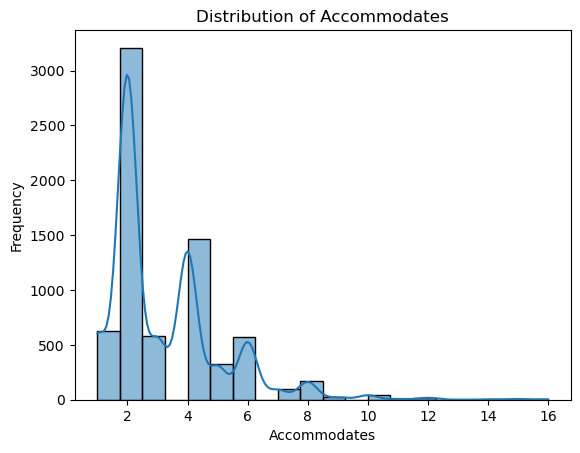

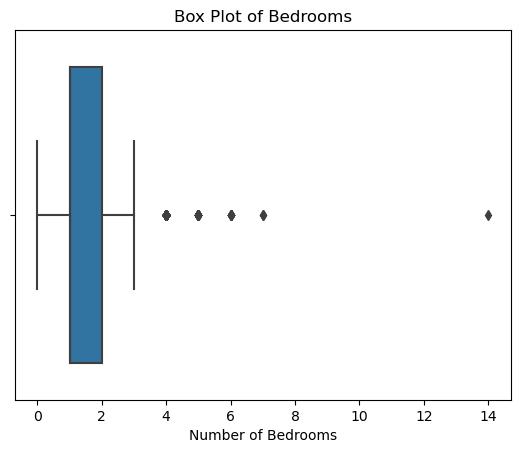

In [5]:
# Plot the distribution of accommodates
sns.histplot(df['accommodates'], bins=20, kde=True)
plt.title('Distribution of Accommodates')
plt.xlabel('Accommodates')
plt.ylabel('Frequency')
plt.show()

# Box plot for bedrooms
sns.boxplot(x=df['bedrooms'])
plt.title('Box Plot of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.show()

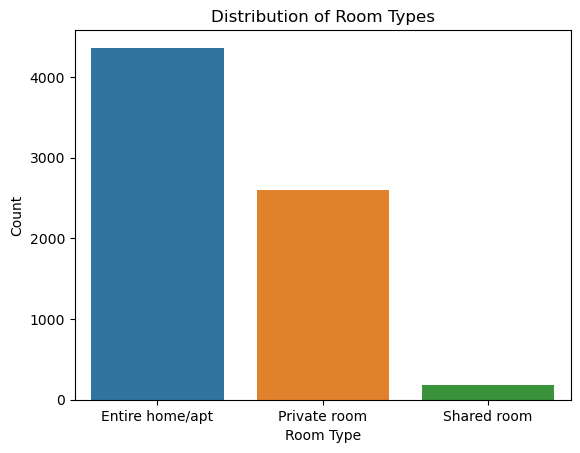

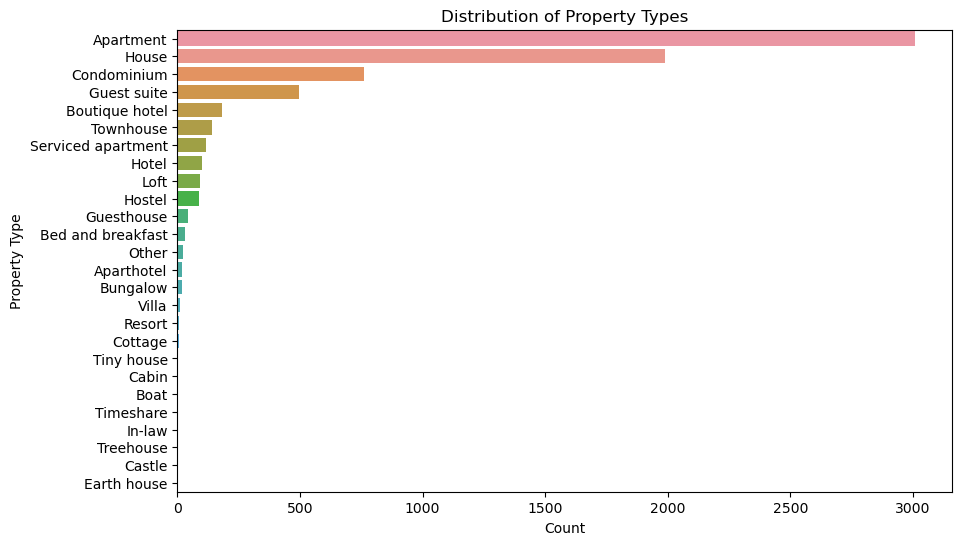

In [6]:
# Bar plot for room_type
sns.countplot(x='room_type', data=df)
plt.title('Distribution of Room Types')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.show()

# Bar plot for property_type
plt.figure(figsize=(10, 6))
sns.countplot(y='property_type', data=df, order=df['property_type'].value_counts().index)
plt.title('Distribution of Property Types')
plt.xlabel('Count')
plt.ylabel('Property Type')
plt.show()

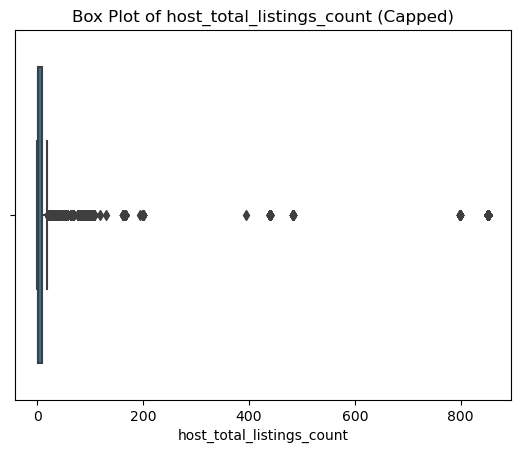

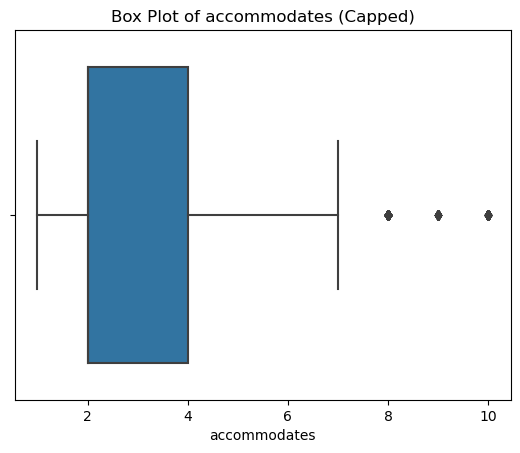

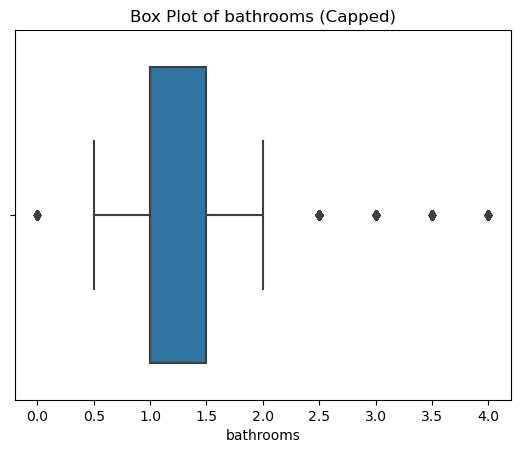

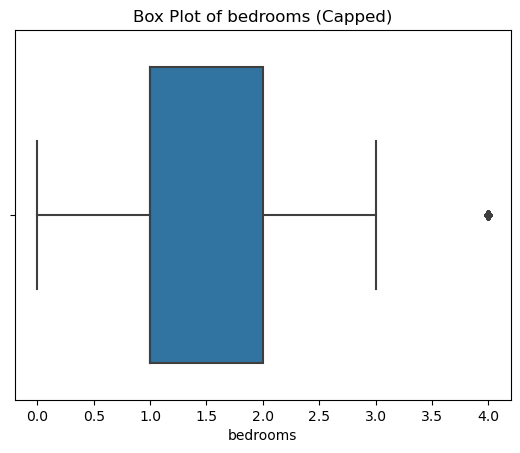

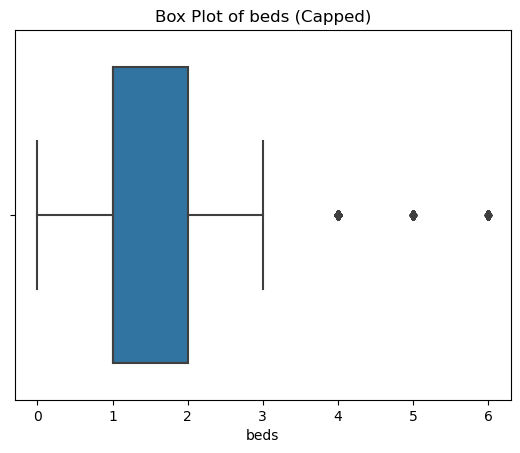

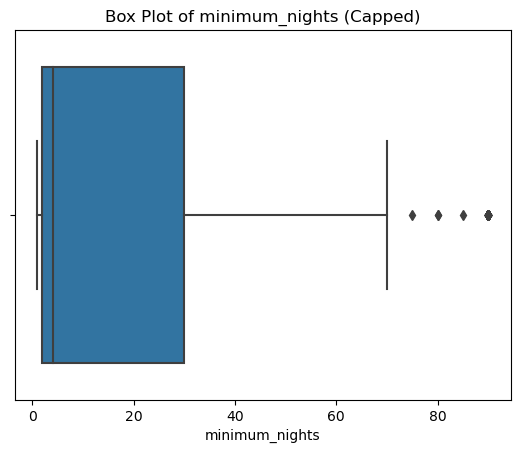

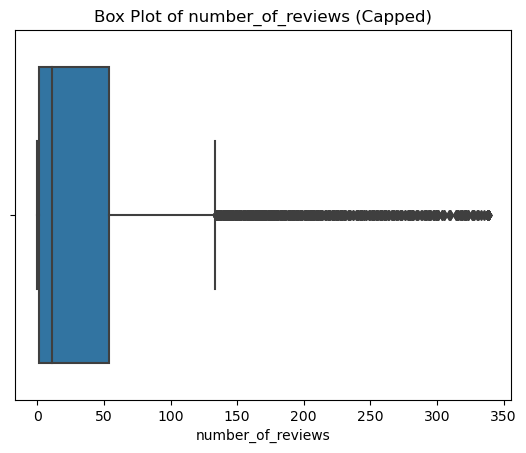

In [ ]:
import numpy as np

# Define the function to cap outliers at a specified percentile
def cap_outliers(df, columns, percentile=0.99):
    for column in columns:
        cap = df[column].quantile(percentile)
        df[column] = np.where(df[column] > cap, cap, df[column])
    return df

# List of numerical variables to cap outliers
columns_to_cap = ['host_total_listings_count', 'accommodates', 'bathrooms', 
                  'bedrooms', 'beds', 'minimum_nights', 'number_of_reviews']

# Apply the outlier capping function to the identified columns
df = cap_outliers(df, columns_to_cap)

for column in columns_to_cap:
    sns.boxplot(x=df[column])
    plt.title(f'Box Plot of {column} (Capped)')
    plt.xlabel(column)
    plt.show()


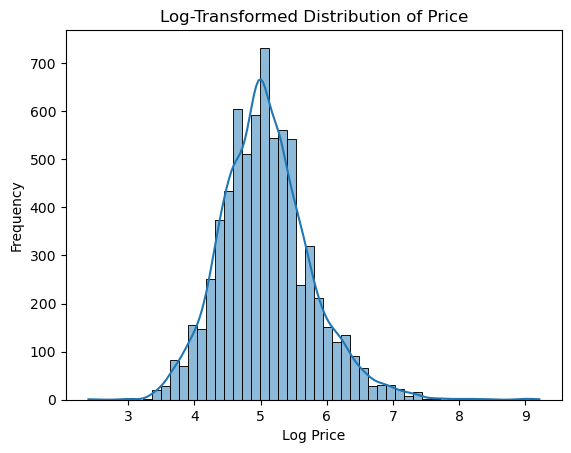

In [10]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Apply log transformation to the price column
df['log_price'] = np.log1p(df['price'])

# Visualize the transformed price distribution
sns.histplot(df['log_price'], bins=50, kde=True)
plt.title('Log-Transformed Distribution of Price')
plt.xlabel('Log Price')
plt.ylabel('Frequency')
plt.show()

In [11]:
# Encoding binary variables as 0 and 1
df['host_is_superhost'] = df['host_is_superhost'].apply(lambda x: 1 if x == 't' else 0)
df['instant_bookable'] = df['instant_bookable'].apply(lambda x: 1 if x == 't' else 0)

# Apply one-hot encoding to the multi-class categorical variables
df_encoded = pd.get_dummies(df, columns=['cancellation_policy', 'neighbourhood_cleansed', 
                                         'property_type', 'room_type', 'bed_type'], drop_first=True)

# Display the first few rows of the encoded dataframe
df_encoded.head()

,host_is_superhost,instant_bookable,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,minimum_nights,...,property_type_Tiny house,property_type_Townhouse,property_type_Treehouse,property_type_Villa,room_type_Private room,room_type_Shared room,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed
0,1,1,1.0,37.76931,-122.43386,3.0,1.0,1.0,2.0,1.0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,2.0,37.74511,-122.42102,5.0,1.0,2.0,3.0,30.0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,10.0,37.76669,-122.45250,2.0,4.0,1.0,1.0,32.0,...,0,0,0,0,1,0,0,0,0,1
3,0,0,10.0,37.76487,-122.45183,2.0,4.0,1.0,1.0,32.0,...,0,0,0,0,1,0,0,0,0,1
4,0,0,2.0,37.77525,-122.43637,5.0,1.5,2.0,2.0,7.0,...,0,0,0,0,0,0,0,0,0,1


In [12]:
# Save the preprocessed dataframe to a CSV file
df_encoded.to_csv('preprocessed_airbnb_data.csv', index=False)